In [440]:
# ----------------------------------------------------------------------------------------------------
# 라이브러리 목록

# 기본 라이브러리 
import re
import pandas as pd

# torch 라이브러리 
import torch
from torch.utils.data import DataLoader, TensorDataset

# pandas 설정
pd.set_option('display.max_rows', None)  # 모든 행 출력
pd.set_option('display.max_columns', None)  # 모든 열 출력

# 개인 라이브러리  
from preparation_for_analysis.show_window import DataVisualizer
from preparation_for_analysis.model_2 import MLP

# preparation_for_analysis 설정
visualizer = DataVisualizer(line="=", length=100, start="#")
# ----------------------------------------------------------------------------------------------------

In [441]:
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsRegressor

In [442]:
# ----------------------------------------------------------------------------------------------------
# new_learning_encoding 불러오기 
new_learning_encoding = pd.read_csv(
    "C:\\Users\\ssalt\\Documents\\ev_price_predict_project\\data\\train\\A_df\\c_learning\\3_new_learning_encoding.csv",
    sep=",",
    header=0
    )

new_learning_encoding.drop(columns=["Mileage_distance"], inplace=True)
new_learning_encoding = new_learning_encoding.astype("float32")
visualizer.show_df_info(title="new_learning_encoding", df=new_learning_encoding)
# ----------------------------------------------------------------------------------------------------


# Title: new_learning_encoding


# DataFrame Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6746 entries, 0 to 6745
Data columns (total 53 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   EV6         6746 non-null   float32
 1   ID4         6746 non-null   float32
 2   ION5        6746 non-null   float32
 3   ION6        6746 non-null   float32
 4   IONIQ       6746 non-null   float32
 5   KNE         6746 non-null   float32
 6   M3          6746 non-null   float32
 7   MS          6746 non-null   float32
 8   MX          6746 non-null   float32
 9   MY          6746 non-null   float32
 10  Niro        6746 non-null   float32
 11  Q4eT        6746 non-null   float32
 12  RSeTGT      6746 non-null   float32
 13  Soul        6746 non-null   float32
 14  Tay         6746 non-null   float32
 15  TayCT       6746 non-null   float32
 16  TayGTS      6746 non-null   float32
 17  eT          6746 non-null   float32
 18  i3      

In [443]:
# ----------------------------------------------------------------------------------------------------
# new_validation_encoding 불러오기 
new_validation_encoding = pd.read_csv(
    "C:\\Users\\ssalt\\Documents\\ev_price_predict_project\\data\\train\\A_df\\d_validation\\3_new_validation_encoding.csv",
    sep=",",
    header=0
    )

new_validation_encoding.drop(columns=["Mileage_distance"], inplace=True)
new_validation_encoding = new_validation_encoding.astype("float32")
visualizer.show_df_info(title="new_validation_encoding", df=new_validation_encoding)
# ----------------------------------------------------------------------------------------------------


# Title: new_validation_encoding


# DataFrame Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 53 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   EV6         750 non-null    float32
 1   ID4         750 non-null    float32
 2   ION5        750 non-null    float32
 3   ION6        750 non-null    float32
 4   IONIQ       750 non-null    float32
 5   KNE         750 non-null    float32
 6   M3          750 non-null    float32
 7   MS          750 non-null    float32
 8   MX          750 non-null    float32
 9   MY          750 non-null    float32
 10  Niro        750 non-null    float32
 11  Q4eT        750 non-null    float32
 12  RSeTGT      750 non-null    float32
 13  Soul        750 non-null    float32
 14  Tay         750 non-null    float32
 15  TayCT       750 non-null    float32
 16  TayGTS      750 non-null    float32
 17  eT          750 non-null    float32
 18  i3      

In [444]:
# ▶ 3. KMeans를 이용해 훈련 데이터에서 가격 기반 군집화
kmeans = KMeans(n_clusters=115, random_state=42, n_init=10)
new_learning_encoding["Cluster"] = kmeans.fit_predict(new_learning_encoding)

In [445]:
# ▶ 4. KNN을 사용해 마일리지만으로 클러스터를 예측하는 모델 학습
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(new_learning_encoding.iloc[:,:-2], new_learning_encoding.loc[:,"Cluster"]) 

KNeighborsRegressor()

In [446]:
new_learning_encoding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6746 entries, 0 to 6745
Data columns (total 54 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   EV6         6746 non-null   float32
 1   ID4         6746 non-null   float32
 2   ION5        6746 non-null   float32
 3   ION6        6746 non-null   float32
 4   IONIQ       6746 non-null   float32
 5   KNE         6746 non-null   float32
 6   M3          6746 non-null   float32
 7   MS          6746 non-null   float32
 8   MX          6746 non-null   float32
 9   MY          6746 non-null   float32
 10  Niro        6746 non-null   float32
 11  Q4eT        6746 non-null   float32
 12  RSeTGT      6746 non-null   float32
 13  Soul        6746 non-null   float32
 14  Tay         6746 non-null   float32
 15  TayCT       6746 non-null   float32
 16  TayGTS      6746 non-null   float32
 17  eT          6746 non-null   float32
 18  i3          6746 non-null   float32
 19  i5          6746 non-null  

In [447]:
# ▶ 5. 검증 데이터에서 클러스터 예측 후 평균 가격 할당
def predict_cluster(row):
    cluster = knn.predict([row.values])[0]  # 예측된 클러스터
    return round(cluster)

new_learning_encoding["Predicted_cluster"] = new_learning_encoding.iloc[:,:-2].apply(predict_cluster, axis=1)

In [449]:
new_learning_encoding.loc[(new_learning_encoding["Cluster"] != new_learning_encoding["Predicted_cluster"]),"Cluster"].size

22

In [450]:
# ----------------------------------------------------------------------------------------------------
# 라이브러리 목록

# 기본 라이브러리 
import numpy as np
import pandas as pd

# 시각화 라이브러리 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# 개인 라이브러리 
from preparation_for_analysis.show_window import DataVisualizer

# pandas 설정
pd.set_option('display.max_rows', None)  # 모든 행 출력
pd.set_option('display.max_columns', None)  # 모든 열 출력

# matplotlib 설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우에서 사용하는 한글 폰트
matplotlib.rcParams['axes.unicode_minus'] = False  # 음수 기호 문제 해결

# preparation_for_analysis 설정
visualizer = DataVisualizer(line="=", length=100, start="#")
# ----------------------------------------------------------------------------------------------------

In [451]:
# ----------------------------------------------------------------------------------------------------
# new_learning 불러오기 
new_learning = pd.read_csv("C:\\Users\\ssalt\\Documents\\ev_price_predict_project\\data\\train\\A_df\\c_learning\\2_new_learning.csv",
                       sep=",",
                       header=0)

visualizer.show_df_info(title="new_learning.info", df=new_learning)
# ----------------------------------------------------------------------------------------------------


# Title: new_learning.info


# DataFrame Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6746 entries, 0 to 6745
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                6746 non-null   object 
 1   Model             6746 non-null   object 
 2   Manufacturer      6746 non-null   object 
 3   Model_year        6746 non-null   object 
 4   Drivetrain        6746 non-null   object 
 5   Warranty          6746 non-null   object 
 6   Accident          6746 non-null   object 
 7   Condition         6746 non-null   object 
 8   Battery           6746 non-null   float64
 9   Mileage_bin       6746 non-null   object 
 10  Mileage_distance  6746 non-null   int64  
 11  Mileage           6746 non-null   int64  
 12  Sample_1          6746 non-null   float64
 13  Sample_2          6746 non-null   float64
 14  Sample_3          6746 non-null   float64
 15  Sample_4          6746 non-null  

In [452]:
new_learning["Cluster"] = new_learning_encoding["Cluster"]

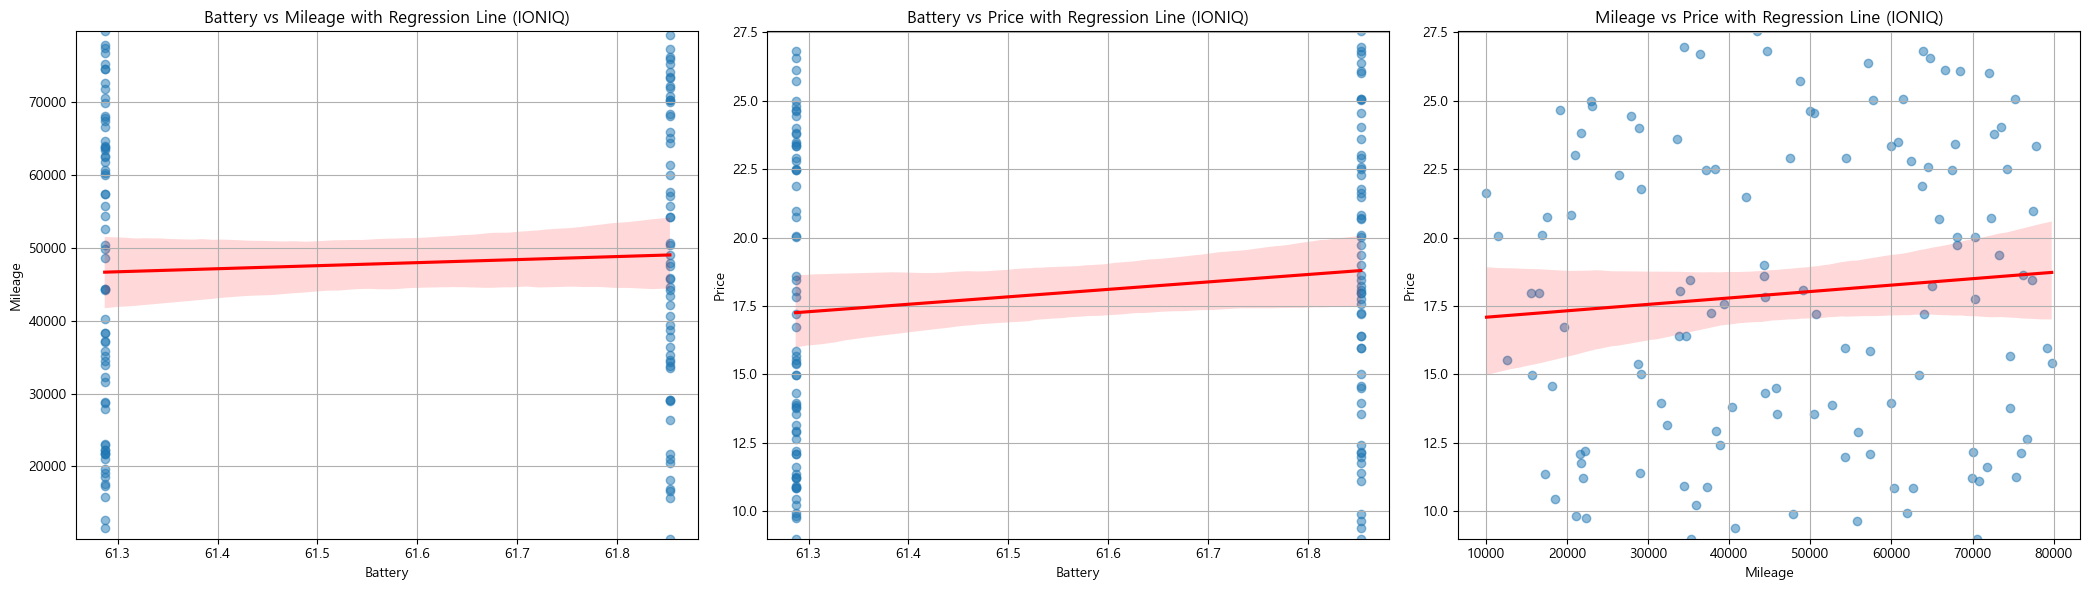

In [456]:
# ----------------------------------------------------------------------------------------------------
# IONIQ 모델 

model_name = "IONIQ"

result = new_learning.loc[(new_learning["Model"] == model_name), :]

# Figure 생성
plt.figure(figsize=(21, 6))

#  시각화
plt.subplot(1, 3, 1)  # 1행 3열 중 1 번째 그래프
sns.regplot(data=result, x="Battery", y="Mileage", scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.xlabel("Battery")
plt.ylabel("Mileage")
plt.title(f"Battery vs Mileage with Regression Line ({model_name})")
plt.grid(True)
plt.ylim(result["Mileage"].min(), result["Mileage"].max())

plt.subplot(1, 3, 2)  # 1행 3열 중 2 번째 그래프
sns.regplot(data=result, x="Battery", y="Price", scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.xlabel("Battery")
plt.ylabel("Price")
plt.title(f"Battery vs Price with Regression Line ({model_name})")
plt.grid(True)
plt.ylim(result["Price"].min(), result["Price"].max())

plt.subplot(1, 3, 3)  # 1행 3열 중 3 번째 그래프
sns.regplot(data=result, x="Mileage", y="Price", scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.title(f"Mileage vs Price with Regression Line ({model_name})")
plt.grid(True)
plt.ylim(result["Price"].min(), result["Price"].max())


# 전체 그래프 표시
plt.tight_layout()
plt.show()
# ----------------------------------------------------------------------------------------------------

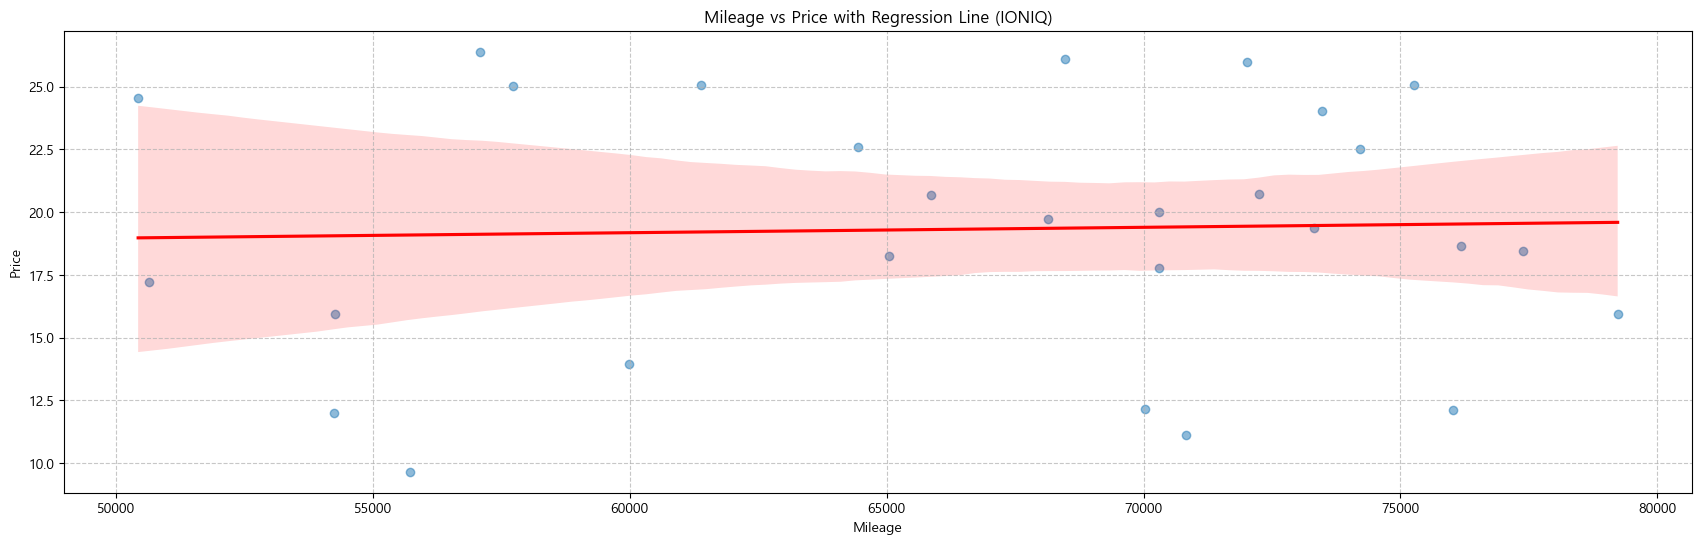

In [458]:
# ----------------------------------------------------------------------------------------------------
# IONIQ 모델 

model_name = "IONIQ"

result = new_learning.loc[(new_learning["Model"] == model_name) &
                          (new_learning["Cluster"] == 17), :]

#  시각화
plt.figure(figsize=(21, 6))
sns.regplot(data=result, x="Mileage", y="Price", scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
# plt.gca().set_xticks(range(0, int(result["Mileage"].max()) + 10000, 10000)) # X축 1000 단위 grid 설정
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.title(f"Mileage vs Price with Regression Line ({model_name})")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()
# ----------------------------------------------------------------------------------------------------

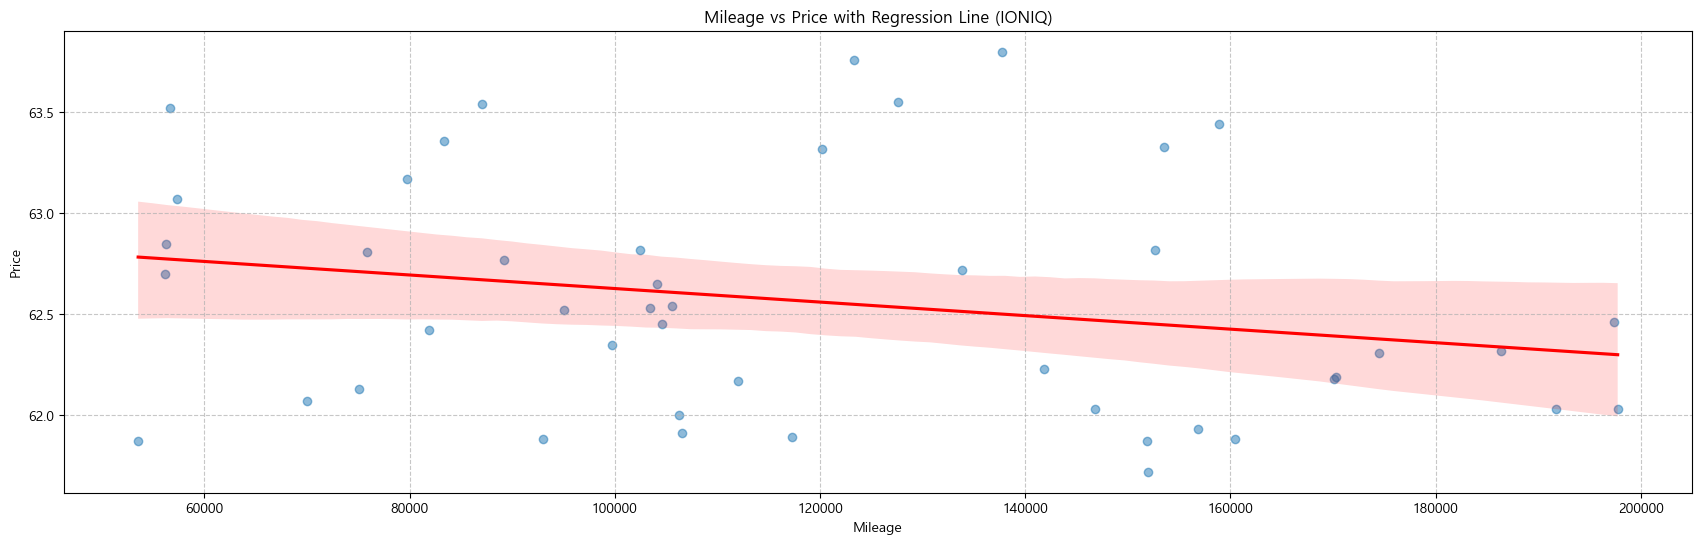

In [459]:
# ----------------------------------------------------------------------------------------------------
# IONIQ 모델 
result = new_learning.loc[(new_learning["Cluster"] == 3), :]

#  시각화
plt.figure(figsize=(21, 6))
sns.regplot(data=result, x="Mileage", y="Price", scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
# plt.gca().set_xticks(range(0, int(result["Mileage"].max()) + 10000, 10000)) # X축 1000 단위 grid 설정
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.title(f"Mileage vs Price with Regression Line ({model_name})")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()
# ----------------------------------------------------------------------------------------------------